#2장 기본 입출력

In [1]:
import cv2
cv2.__version__

'4.10.0'

In [2]:
!git clone https://github.com/dltpdn/insightbook.opencv_project_python

Cloning into 'insightbook.opencv_project_python'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 469 (delta 23), reused 38 (delta 16), pack-reused 389 (from 1)
Receiving objects: 100% (469/469), 30.72 MiB | 8.88 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Updating files: 100% (370/370), done.


In [3]:
%cd /content/insightbook.opencv_project_python/02.interface

/content/insightbook.opencv_project_python/02.interface


##2.1 이미지와 비디오 입출력

###2.1.1 이미지 읽기

`cv2.imread(filename, flags=cv2.IMREAD_COLOR)`
- filename:
  - 읽어올 이미지 파일의 경로를 문자열로 지정.
  - 파일 경로는 절대 경로나 상대 경로 모두 사용.

- flag
  - `cv2.IMREAD_COLOR` (1) : 이미지 파일을 Color로 읽어들이고, 투명한 부분은 무시되며, Default 값
  - `cv2.IMREAD_GRAYSCALE` (0) : 이미지를 Grayscale로 읽음. 실제 이미지 처리시 중간단계로 많이 사용
  - `cv2.IMREAD_UNCHANGED` (-1) : 이미지 파일을 alpha channel (투명도)까지 포함하여 읽어 들임

- 반환값
  - 이미지 배열 (NumPy 배열 형식): 파일에서 읽은 이미지 데이터가 담긴 NumPy 배열 반환. .
- **(주의)** `cv2.imread()`는 잘못된 경로로 읽어도 `NoneType`으로 들어갈 뿐, <u>오류를 발생하지 않음</u>

`cv2_imshow(img)`
- img:
  - 출력할 이미지 데이터가 담긴 NumPy 배열.

- `cv2.imshow()`와 비슷한 기능을 하지만, Jupyter Notebook 환경에서 사용하기 위해 특별히 설계된 함수
  - `cv2.imshow()` 함수가 Jupyter Notebook에서 제대로 작동하지 않는 문제를 해결하기 위해 OpenCV와 Google Colab에서 제공하는 함수.

- `from google.colab.patches import cv2_imshow`

In [4]:
from google.colab.patches import cv2_imshow

`cv2.imshow(winname, img)`
- winname:
  - 문자열로, 이미지를 표시할 창의 이름 지정
  - 이 이름은 창의 제목 표시줄에 표시되며, 여러 개의 이미지를 출력할 때 각 창을 구별하기 위해 사용됨.

- img:
  - 출력할 이미지 데이터가 담긴 NumPy 배열
  - OpenCV로 읽거나 처리한 이미지 데이터를 포함.
  - BGR 형식의 이미지 표시

- 기능 설명
  - `cv2.imshow`는 지정된 이름의 창을 생성하고, 해당 창에 이미지 표시
  - 이미지 처리 작업 후 결과를 시각적으로 확인할 때 사용
  - 이미지를 표시한 후, 창이 바로 닫히지 않도록 `cv2.waitKey(0)`(무한대기) 함수와 함께 사용.

`cv2.waitKey(delay)`
- delay:
  - 키 입력을 기다리는 시간(밀리초 단위)을 나타내는 정수.
    - 0: 무한정 키 입력을 기다림.
      - 사용자가 키를 누를 때까지 대기합니다.
    - 양의 정수: 지정된 시간(밀리초) 동안 키 입력을 기다림.
      - 예를 들어, delay=1000으로 설정하면 1초 동안 대기한 후 다음 코드로 넘어감.

- 반환값
  - 정수 값: 사용자가 누른 키의 ASCII 코드 값 반환
  - 대기 시간 동안 키가 눌리지 않으면 -1 반환
  - 특정 키 입력에 따라 동작 다르게 설정 가능
  
- 기능 설명
  - 이미지 창 유지:
    - `cv2.imshow()`로 이미지를 표시한 후, cv2.waitKey()를 호출하지 않으면 프로그램이 즉시 종료되고 이미지 창이 닫힘.
    - 이를 방지하기 위해 `cv2.waitKey()`를 사용해 창이 일정 시간 동안 또는 키 입력이 있을 때까지 유지되도록 함.
  - 동영상 프레임 제어:
    - 동영상을 처리할 때 각 프레임 사이에 일정한 지연을 주어 재생 속도 조절
      - 예를 들어, delay=30으로 설정하면 약 30 FPS의 속도로 동영상 재생

`cv2.destroyAllWindows()`
- 기능 설명
  - 모든 창 닫기: 이 함수는 현재 열려 있는 모든 OpenCV 창 닫음.
  - OpenCV에서는 여러 개의 창을 동시에 열 수 있는데, 이 함수는 그 모든 창을 한 번에 종료
  - 자원 해제: 창을 닫으면서 시스템에서 사용하고 있던 자원도 해제됨.
    - 따라서, 프로그램이 종료될 때 메모리 누수를 방지하는 데 도움을 줌.

- 특정 창만 닫기:
  - cv2.destroyWindow(winname) 함수 사용하여 해당 이름의 창만 닫을 수 있음.

In [5]:
!python img_show.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



In [2]:
#%%writefile img_show.py
from google.colab.patches import cv2_imshow

import cv2

img_file = "../img/girl.jpg"   # 표시할 이미지 경로               --- ①
img = cv2.imread(img_file)     # 이미지를 읽어서 img 변수에 할당  --- ②

if img is not None:
  #cv2.imshow('IMG', img)      # 읽은 이미지를 화면에 표시        --- ③
  cv2_imshow(img)              # 읽은 이미지를 화면에 표시        --- ③
  cv2.waitKey()                # 키가 입력될 때 까지 대기         --- ④
  cv2.destroyAllWindows()      # 창 모두 닫기                     --- ⑤
else:
    print('No image file.')

No image file.


In [3]:
!python img_show_gray.py

python3: can't open file '/content/img_show_gray.py': [Errno 2] No such file or directory


In [4]:
from google.colab.patches import cv2_imshow
import cv2

img_file = "../img/girl.jpg"
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)   # 그레이 스케일로 읽기
#img = cv2.imread(img_file, cv2.IMREAD_COLOR)      # Color  스케일로 읽기
#img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)  # 그대로 읽기 알파브랜딩도

if img is not None:
    #cv2.imshow('IMG', img)
    cv2_imshow(img)
    cv2.waitKey()
    cv2.destroyAllWindows()
else:
    print('No image file.')

No image file.


###2.1.2 이미지 저장하기

`cv2.imwrite(filename, img, [params])`
- filename:
  - 저장할 이미지 파일의 경로를 문자열로 지정.
  - 파일 경로는 절대 경로나 상대 경로 모두 사용.

- img
  - 저장할 이미지.
  - NumPy 배열로 표현

- params
  - 이미지 저장 시 사용할 추가적인 매개변수.
  - 리스트 형식으로 전달되며, 이미지 형식에 따라 다르게 사용됨.
    - 압축률이나 품질 지정

  - `cv2.IMWRITE_JPEG_QUALITY` : JPEG 파일 품질 설정
     - 값 : 0에서 100, 기본값 95
     - 값이 클수록 이미지 품질이 높아지고 파일 크기 커짐.

  - `cv2.IMWRITE_PNG_COMPRESSION` : PNG 파일 압축 수준 설정
     - 값 : 0에서 9, 기본값 3
     - 값이 클수록 압축이 강해져서 파일 크기가 줄어들지만, 저장 속도가 느려짐.

  - `cv2.IMWRITE_WEBP_QUALITY` : WebP 파일 품질 설정
     - 값 : 1에서 100, 기본값 100
     
- 반환값
  - True or False: 이미지 파일이 성공적으로 저장되면 True, 실패하면 False 반환.
  - 파일 저장이 실패하는 경우는 주로 경로가 잘못되었거나 디스크 용량이 부족한 경우임

In [9]:
!python img_write.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



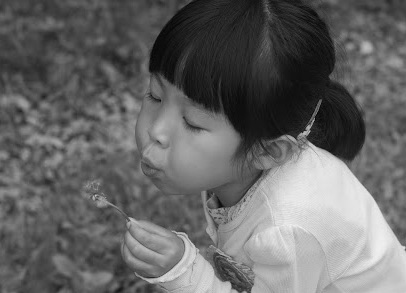

In [10]:
import cv2

img_file = '../img/girl.jpg'
save_file = '../img/girl_gray.jpg'

img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
#cv2.imshow(img_file, img)

cv2_imshow(img)

cv2.imwrite(save_file, img)      #파일로 저장, 포맷은 확장에 따름
# 이미지 저장 (JPEG 품질 90)
#cv2.imwrite('output_quality90.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])
# 이미지 저장 (PNG 압축률 5)
#cv2.imwrite('output_compressed.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 5])

cv2.waitKey()
cv2.destroyAllWindows()

###2.1.3 동영상 및 카메라 프레임 읽기

`cv2.VideoCapture(source, apiPreference)
`
- 기능 설명
  - OpenCV에서 비디오 파일을 읽거나, 웹캠과 같은 비디오 장치로부터 실시간 영상을 캡처하기 위해 사용되는 클래스입니다. 이 클래스는 비디오 데이터를 프레임 단위로 처리할 수 있도록 도와줍니다.

- source:
  - 비디오 파일 경로: 읽고자 하는 비디오 파일의 경로를 문자열로 지정
    - 예를 들어, "video.mp4" 같은 파일명을 넣으면 해당 비디오 파일을 열 수 있음.
  - 카메라 장치 인덱스: 숫자로 지정된 인덱스를 통해 연결된 카메라 선택
    - 0은 기본 웹캠을, 1은 두 번째 연결된 카메라

- apiPreference (선택 사항):
  - 특정 비디오 캡처 API를 사용할 때 선택적으로 지정할 수 있는 매개변수.
    - `cv2.CAP_DSHOW`는 DirectShow(Windows)를 사용
    - `cv2.CAP_V4L2`는 Video4Linux2(Linux)를 사용


- 주요 메서드
  - `open()` : 비디오 파일이나 카메라 장치를 열기 위해 사용.
    - 생성자에서 이미 열었기 때문에 일반적으로 필요하지 않지만, VideoCapture 객체를 재사용할 경우 유용합니다.
  - `isOpened()` : 비디오 파일이나 카메라가 정상적으로 열렸는지 확인하는 메서드.
    - True를 반환하면 성공적으로 열렸다는 의미.

  - `read()` : 비디오의 다음 프레임을 읽어옴. 이 메서드는 두 개의 값을 반환함:
    - ret: 프레임을 성공적으로 읽으면 True, 실패하면 False 반환.
    - frame: 읽어들인 프레임을 반환. 만약 읽기에 실패하면 None 반환.

  - `release()` : 비디오 파일이나 카메라 장치를 닫고 자원 해제함.
    - 작업이 끝나면 반드시 호출해야 합니다.

  - `set(propId, value)` : 비디오 캡처 속성을 설정하는 메서드.
    - 예를 들어, 해상도, 프레임 속도 등을 설정

  - `get(propId)` : 비디오 캡처 속성을 가져오는 메서드.
    - 예를 들어, 현재 프레임 위치, 해상도 등을 가져올 수 있음.

###2.1.4 동영상 파일 읽기

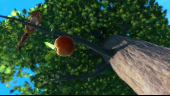

In [11]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image
import time

cap = cv2.VideoCapture('../img/big_buck.avi')

while cap.isOpened():
#while True:
  ok, frame = cap.read()

  if not ok:
    break

  if ok:
    #edit your video size here, to adjust the performance
    largura=frame.shape[1]
    altura=frame.shape[0]
    lamenor=int(frame.shape[1]/5)
    altmenor=int(frame.shape[0]/5)
    frame = cv2.resize(frame, (lamenor,altmenor))

    # as you read
    clear_output(wait=True)
    cv2_imshow(frame)
    #delay time to update frame
    #time.sleep(1.1)
    time.sleep(0.1)

  if cv2.waitKey(1100) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

In [12]:
!python video_play.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



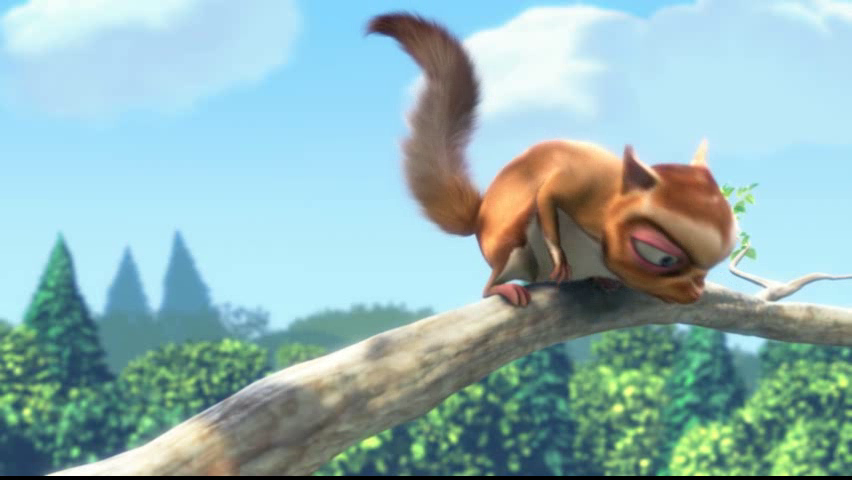

In [13]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image
import cv2

video_file = "../img/big_buck.avi"         # 동영상 파일 경로

cap = cv2.VideoCapture(video_file)         # 동영상 캡쳐 객체 생성  ---①
if cap.isOpened():                         # 캡쳐 객체 초기화 확인
    cnt = 0
    while True:
        ret, img = cap.read()              # 다음 프레임 읽기      --- ②
        if ret:                            # 프레임 읽기 정상
            clear_output(wait=True)
            #cv2.imshow(video_file, img)   # 화면에 표시  --- ③
            cv2_imshow(img)                # 화면에 표시  --- ③
            cv2.waitKey(25)                # 25ms 지연(40fps로 가정)   --- ④
            cnt += 1
            if cnt == 10:
                break
        else:                              # 다음 프레임 읽을 수 없슴,
            break                          # 재생 완료
else:
    print("can't open video.")             # 캡쳐 객체 초기화 실패
cap.release()                              # 캡쳐 자원 반납
cv2.destroyAllWindows()

### 2.1.5 카메라(웹캠) 프레임 읽기

In [14]:
!python video_cam.py

[ WARN:0@0.023] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@0.023] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
can't open camera.


In [15]:
import cv2

cap = cv2.VideoCapture(0)               # 0번 카메라 장치 연결 ---①
if cap.isOpened():                      # 캡쳐 객체 연결 확인
    while True:
        ret, img = cap.read()           # 다음 프레임 읽기
        if ret:
            cv2.imshow('camera', img)   # 다음 프레임 이미지 표시
            if cv2.waitKey(1) != -1:    # 1ms 동안 키 입력 대기 ---②
                break                   # 아무 키라도 입력이 있으면 중지
        else:
            print('no frame')
            break
else:
    print("can't open camera.")
cap.release()                           # 자원 반납
cv2.destroyAllWindows()

can't open camera.


### 2.1.6 카메라 비디오 속성 제어

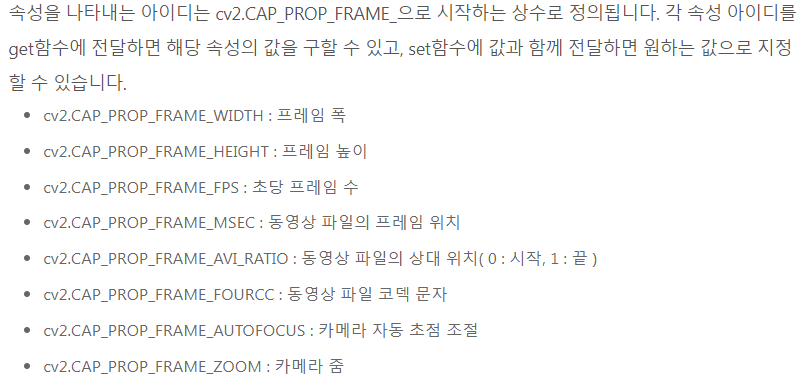

In [16]:
!python video_play_fps.py

FPS: 24.000000, Delay: 41ms
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



In [17]:
from IPython.display import clear_output, Image
import cv2

video_file = "../img/big_buck.avi" # 동영상 파일 경로

cap = cv2.VideoCapture(video_file) # 동영상 캡쳐 객체 생성
if cap.isOpened():                 # 캡쳐 객체 초기화 확인
    fps = cap.get(cv2.CAP_PROP_FPS) # 프레임 수 구하기
    delay = int(1000/fps)
    print("FPS: %f, Delay: %dms" %(fps, delay))

    while True:
        ret, img = cap.read()      # 다음 프레임 읽기
        if ret:                     # 프레임 읽기 정상
            clear_output(wait=True)
            #cv2.imshow(video_file, img) # 화면에 표시
            cv2_imshow(img) # 화면에 표시
            cv2.waitKey(delay)            # fps에 맞게 시간 지연
        else:
            break                   # 다음 프레임 읽을 수 없슴, 재생 완료
else:
    print("can't open video.")      # 캡쳐 객체 초기화 실패
cap.release()                       # 캡쳐 자원 반납
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
!python video_cam_resize.py

In [ ]:
import cv2

cap = cv2.VideoCapture(0)                   # 카메라 0번 장치 연결
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # 프레임 폭 값 구하기
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # 프레임 높이 값 구하기
print("Original width: %d, height:%d" % (width, height) )

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)      # 프레임 폭을 320으로 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)     # 프레임 높이를 240으로 설정
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # 재지정한 프레임 폭 값 구하기
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # 재지정한 프레임 폭 값 구하기

print("Resized width: %d, height:%d" % (width, height) )
if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            #cv2.imshow('camera', img)
            cv2_imshow(img)
            if cv2.waitKey(1) != -1:
                break
        else:
            print('no frame!')
            break
else:
    print("can't open camera!")
cap.release()
cv2.destroyAllWindows()

### 2.1.7 비디오 파일 저장하기

In [ ]:
!python video_cam_take_pic.py

In [ ]:
import cv2

cap = cv2.VideoCapture(0)                       # 0번 카메라 연결
if cap.isOpened() :
    while True:
        ret, frame = cap.read()                 # 카메라 프레임 읽기
        if ret:
            #cv2.imshow('camera',frame)         # 프레임 화면에 표시
            cv2_imshow(frame)                   # 프레임 화면에 표시
            if cv2.waitKey(1) != -1:            # 아무 키나 누르면
                cv2.imwrite('photo.jpg', frame) # 프레임을 'photo.jpg'에 저장
                break
        else:
            print('no frame!')
            break
else:
    print('no camera!')
cap.release()
cv2.destroyAllWindows()

In [ ]:
!python video_cam_rec.py

In [ ]:
import cv2

cap = cv2.VideoCapture(0)    # 0번 카메라 연결
if cap.isOpened:
    file_path = './record.avi'    # 저장할 파일 경로 이름 ---①
    fps = 30.0                     # FPS, 초당 프레임 수
    fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 인코딩 포맷 문자
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))                        # 프레임 크기
    out = cv2.VideoWriter(file_path, fourcc, fps, size) # VideoWriter 객체 생성
    while True:
        ret, frame = cap.read()
        if ret:
            #cv2.imshow('camera-recording',frame)
            cv2_imshow(frame)
            out.write(frame)                        # 파일 저장
            if cv2.waitKey(int(1000/fps)) != -1:
                break
        else:
            print("no frame!")
            break
    out.release()                                   # 파일 닫기
else:
    print("can't open camera!")
cap.release()
cv2.destroyAllWindows()

##2.2 그림 그리기

In [ ]:
!mkdir img

In [ ]:
!python blank_img.py

In [ ]:
import cv2
import numpy as np

#img = np.full((500,500,3), 255, dtype=np.uint8)
img = np.full((500,500,3), 0, dtype=np.uint8)
#cv2.imwrite('./img/blank_500.jpg', img)
cv2.imwrite('./img/blank_000.jpg', img)

### 2.2.1 직선 그리기

`cv2.line(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 선을 그릴 때 사용하는 함수
  - 이 함수는 두 점을 연결하는 선을 이미지 위에 그려주는 역할
  - 주로 이미지에 도형을 그리거나, 특정 객체를 강조할 때 사용됨.

- 매개변수
  - img:
    - 선을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - pt1:
    - 선의 시작점 좌표를 나타내는 튜플 (x, y) 형식.
  - pt2:
    - 선의 끝점 좌표를 나타내는 튜플 (x, y) 형식.
  - color:
    - 선의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 선의 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python line.py

In [ ]:
import cv2

img = cv2.imread('../img/blank_500.jpg')

cv2.line(img, (50, 50), (150, 50), (255,0,0))   # 파란색 1픽셀 선
cv2.line(img, (200, 50), (300, 50), (0,255,0))  # 초록색 1픽셀 선
cv2.line(img, (350, 50), (450, 50), (0,0,255))  # 빨간색 1픽셀 선

# 하늘색(파랑+초록) 10픽셀 선
cv2.line(img, (100, 100), (400, 100), (255,255,0), 10)
# 분홍(파랑+빨강) 10픽셀 선
cv2.line(img, (100, 150), (400, 150), (255,0,255), 10)
# 노랑(초록+빨강) 10픽셀 선
cv2.line(img, (100, 200), (400, 200), (0,255,255), 10)
# 회색(파랑+초록+빨강) 10픽셀 선
cv2.line(img, (100, 250), (400, 250), (200,200,200), 10)
# 검정 10픽셀 선
cv2.line(img, (100, 300), (400, 300), (0,0,0), 10)

# 4연결 선
cv2.line(img, (100, 350), (400, 400), (0,0,255), 20, cv2.LINE_4)
# 8연결 선
cv2.line(img, (100, 400), (400, 450), (0,0,255), 20, cv2.LINE_8)
# 안티에일리어싱 선
cv2.line(img, (100, 450), (400, 500), (0,0,255), 20, cv2.LINE_AA)
# 이미지 전체에 대각선
cv2.line(img, (0,0), (500,500), (0,0,255))

#cv2.imshow('lines', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.2 사각형 그리기

`cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 직사각형을 그릴 때 사용하는 함수
  - 이 함수는 두 점을 연결하는 사각형을 이미지 위에 그려주는 역할
  - 주로 객체 감지 결과를 시각적으로 표시하거나, 특정 객체를 강조할 때 사용됨.

- 매개변수
  - img:
    - 직사각형을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - pt1:
    - 직사각형의 왼쪽 위 모서리 좌표를 나타내는 튜플 (x, y) 형식.
  - pt2:
    - 직사각형의 오른쪽 아래 모서리  좌표를 나타내는 튜플 (x, y) 형식.
  - color:
    - 직사각형의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 직사각형의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 직사각형이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_rect.py

In [ ]:
import cv2

img = cv2.imread('../img/blank_500.jpg')

# 좌상, 우하 좌표로 사각형 그리기
cv2.rectangle(img, (50, 50), (150, 150), (255,0,0) )
# 우하, 좌상 좌표로 사각형 그리기
cv2.rectangle(img, (300, 300), (100, 100), (0,255,0), 10 )
# 우상, 좌하 좌표로 사각형 채워 그리기 ---①
cv2.rectangle(img, (450, 200), (200, 450), (0,0,255), -1 )

#cv2.imshow('rectangle', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.3 다각형 그리기

`cv2.polylines(img, pts, isClosed, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 여러 개의 점들을 연결하여 폴리라인(다각형의 경계선)을 그릴 때 사용하는 함수
  - 이 함수는 이미지 위에 닫힌 또는 열린 다각형을 그리는 데 유용하며, 다양한 도형을 그려주는 역할
  - 주로 객체의 윤곽선을 강조하거나 복잡한 다각형 모양을 그릴 때 사용됨.

- 매개변수
  - img:
    - 다각형을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - pts:
    - 다각형의 꼭짓점 좌표를 담은 리스트
    - 이 리스트는 Numpy 배열로 표현
    - 배열의 형태는 `(number_of_points, 1, 2)`. 각 점은 `(x, y)` 형식의 좌표.

  - isClosed:
    - 폴리라인의 마지막 점과 첫 번째 점을 연결하여 닫힌 다각형을 만들지 여부를 결정하는 Boolean 값
    - True로 설정하면 폴리라인이 닫힌 다각형이 되고, False로 설정하면 열린 폴리라이됨.

  - color:
    - 폴리라인의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 폴리라인의 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_poly.py

In [ ]:
import cv2
import numpy as np                          # 좌표 표현을 위한 numpy 모듈  ---①

img = cv2.imread('../img/blank_500.jpg')

# Numpy array로 좌표 생성 ---②
# 번개 모양 선 좌표
pts1 = np.array([[50,50], [150,150], [100,140],[200,240]], dtype=np.int32)
# 삼각형 좌표
pts2 = np.array([[350,50], [250,200], [450,200]], dtype=np.int32)
# 삼각형 좌표
pts3 = np.array([[150,300], [50,450], [250,450]], dtype=np.int32)
# 5각형 좌표
pts4 = np.array([[350,250], [450,350], [400,450], [300,450], [250,350]],\
                 dtype=np.int32)

# 다각형 그리기 ---③
cv2.polylines(img, [pts1], False, (255,0,0))       # 번개 모양 선 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10)     # 3각형 열린 선 그리기 ---④
cv2.polylines(img, [pts3], True, (0,0,255), 10)    # 3각형 닫힌 도형 그리기 ---⑤
cv2.polylines(img, [pts4], True, (0,0,0))          # 5각형 닫힌 도형 그리기

#cv2.imshow('polyline', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.4 원, 타원, 호 그리기

`cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 원(circle)을 그릴 때 사용하는 함수
  - 이 함수는 중심 좌표와 반지름을 지정하여 이미지 위에 원을 그려주는 역할
  - 주로 객체의 중심을 표시하거나, 특정 영역을 강조할 때 사용됨.

- 매개변수
  - img:
    - 원을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - center:
    - 원의 중심 좌표를 나타내는 튜플 `(x, y)` 형식.
    - 예를 들어, (250, 250)은 이미지 내에서 원의 중심이 되는 위치를 지정.
  - radius:
    - 원의 반지름을 나타내는 정수 값.
    - 예를 들어, radius=50으로 설정하면 반지름이 50인 원이 그림.
  - color:
    - 원의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 원의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

`cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 타원(ellipse)을 그릴 때 사용하는 함수
  - 이 함수는 지정된 중심, 축의 길이, 회전 각도 등을 기준으로 타원을 그려주며, 타원형의 도형을 정확하게 시각화하는 데 유용함.
  - 타원은 원을 일반화한 형태로, 중심, 반지름(축의 길이), 회전 등을 조절하여 다양한 형태의 타원을 그릴 수 있음.

- 매개변수
  - img: 타원을 그릴 이미지입니다. 이 이미지는 NumPy 배열 형태로 제공.

  - center: 타원의 중심 좌표를 나타내는 튜플 (x, y) 형식.

  - axes: 타원의 반지름을 나타내는 튜플 (major_axis_length, minor_axis_length) 형식. 여기서 major_axis_length는 주요 축의 길이, minor_axis_length는 부축의 길이.

  - angle: 타원의 회전 각도를 지정하는 값. 단위는 도(degree)이며, 주어진 각도만큼 타원이 회전.

  - startAngle: 타원 호의 시작 각도를 지정하는 값. 단위는 도(degree).

  - endAngle: 타원 호의 끝 각도를 지정하는 값. 단위는 도(degree).

  - color:
    - 타원의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 타원의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_circle.py

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('../img/blank_500.jpg')

# 원점(150,150), 반지름 100 ---①
cv2.circle(img, (150, 150), 100, (255,0,0))
# 원점(300,150), 반지름 70 ---②
cv2.circle(img, (300, 150), 70, (0,255,0), 5)
# 원점(400,150), 반지름 50, 채우기 ---③
cv2.circle(img, (400, 150), 50, (0,0,255), -1)

# 원점(50,300), 반지름(50), 회전 0, 0도 부터 360도 그리기 ---④
cv2.ellipse(img, (50, 300), (50, 50), 0, 0, 360, (0,0,255))
# 원점(150, 300), 아래 반원 그리기 ---⑤
cv2.ellipse(img, (150, 300), (50, 50), 0, 0, 180, (255,0,0))
#원점(200, 300), 윗 반원 그리기 ---⑥
cv2.ellipse(img, (200, 300), (50, 50), 0, 181, 360, (0,0,255))

# 원점(325, 300), 반지름(75,50) 납작한 타원 그리기 ---⑦
cv2.ellipse(img, (325, 300), (75, 50), 0, 0, 360, (0,255,0))
# 원점(450,300), 반지름(50,75) 홀쭉한 타원 그리기 ---⑧
cv2.ellipse(img, (450, 300), (50, 75), 0, 0, 360, (255,0,255))

# 원점(50, 425), 반지름(50,75), 회전 15도 ---⑨
cv2.ellipse(img, (50, 425), (50, 75), 15, 0, 360, (0,0,0))
# 원점(200,425), 반지름(50,75), 회전 45도 ---⑩
cv2.ellipse(img, (200, 425), (50, 75), 45, 0, 360, (0,0,0))

# 원점(350,425), 홀쭉한 타원 45도 회전 후 아랫 반원 그리기 ---⑪
cv2.ellipse(img, (350, 425), (50, 75), 45, 0, 180, (0,0,255))
# 원점(400,425), 홀쭉한 타원 45도 회전 후 윗 반원 그리기 ---⑫
cv2.ellipse(img, (400, 425), (50, 75), 45, 181, 360, (255,0,0))

#cv2.imshow('circle', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.5 글씨 그리기

`cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None)`
- 기능 설명
  - 이미지 위에 텍스트를 추가할 때 사용하는 함수
  - 이 함수는 지정된 위치에 텍스트를 삽입하며, 폰트 스타일, 크기, 색상, 두께 등을 조절할 수 있어 이미지에 주석을 달거나 정보를 표시할 때 유용

- 매개변수
  - img:
    - 타원을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.

  - text:
    - 이미지에 추가할 텍스트 문자열.
    - 예를 들어, "Hello, World!"와 같은 형태로 입력.

  - org:
    - 텍스트의 시작 좌표를 나타내는 튜플 (x, y) 형식
    - 텍스트의 왼쪽 하단 모서리가 이 좌표에 위치.

  - fontFace: 폰트 종류를 지정하는 매개변수. OpenCV는 여러 가지 폰트를 지원:
    - cv2.FONT_HERSHEY_SIMPLEX: 기본 산세리프 폰트
    - cv2.FONT_HERSHEY_PLAIN: 기본 산세리프 폰트, 더 얇은 버전
    - cv2.FONT_HERSHEY_DUPLEX: 더 두꺼운 기본 산세리프 폰트
    - cv2.FONT_HERSHEY_COMPLEX: 복잡한 산세리프 폰트
    - cv2.FONT_HERSHEY_TRIPLEX: 더 두껍고 복잡한 산세리프 폰트
    - cv2.FONT_HERSHEY_COMPLEX_SMALL: 작은 복잡한 산세리프 폰트
    - cv2.FONT_HERSHEY_SCRIPT_SIMPLEX: 필기체 폰트
    - cv2.FONT_HERSHEY_SCRIPT_COMPLEX: 더 복잡한 필기체 폰트
  - fontScale:
    - 폰트의 크기를 조정하는 값. 숫자가 클수록 폰트가 커짐.

  - color:
    - 텍스트의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 텍스트의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_text.py

In [ ]:
import cv2

img = cv2.imread('../img/blank_500.jpg')

# sans-serif small
cv2.putText(img, "Plain", (50, 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0,0))
# sans-serif normal
cv2.putText(img, "Simplex", (50, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0,0))
# sans-serif bold
cv2.putText(img, "Duplex", (50, 110), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0,0))
# sans-serif normall X2  ---①
cv2.putText(img, "Simplex", (200, 110), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,250))

# serif small
cv2.putText(img, "Complex Small", (50, 180), cv2.FONT_HERSHEY_COMPLEX_SMALL, \
            1, (0, 0,0))
# serif normal
cv2.putText(img, "Complex", (50, 220), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0,0))
# serif bold
cv2.putText(img, "Triplex", (50, 260), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0,0))
# serif normal X2  ---②
cv2.putText(img, "Complex", (200, 260), cv2.FONT_HERSHEY_TRIPLEX, 2, (0,0,255))

# hand-wringing sans-serif
cv2.putText(img, "Script Simplex", (50, 330), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, \
            1, (0, 0,0))
# hand-wringing serif
cv2.putText(img, "Script Complex", (50, 370), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, \
            1, (0, 0,0))

# sans-serif + italic ---③
cv2.putText(img, "Plain Italic", (50, 430), \
            cv2.FONT_HERSHEY_PLAIN | cv2.FONT_ITALIC, 1, (0, 0,0))
# sarif + italic
cv2.putText(img, "Complex Italic", (50, 470), \
            cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 1, (0, 0,0))

#cv2.imshow('draw text', img)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

##2.2 그림 그리기

In [ ]:
!mkdir img

In [ ]:
!python blank_img.py

In [ ]:
import cv2
import numpy as np

#img = np.full((500,500,3), 255, dtype=np.uint8)
img = np.full((500,500,3), 0, dtype=np.uint8)
#cv2.imwrite('./img/blank_500.jpg', img)
cv2.imwrite('./img/blank_000.jpg', img)

### 2.2.1 직선 그리기

`cv2.line(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 선을 그릴 때 사용하는 함수
  - 이 함수는 두 점을 연결하는 선을 이미지 위에 그려주는 역할
  - 주로 이미지에 도형을 그리거나, 특정 객체를 강조할 때 사용됨.

- 매개변수
  - img:
    - 선을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - pt1:
    - 선의 시작점 좌표를 나타내는 튜플 (x, y) 형식.
  - pt2:
    - 선의 끝점 좌표를 나타내는 튜플 (x, y) 형식.
  - color:
    - 선의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 선의 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python line.py

In [ ]:
import cv2

img = cv2.imread('../img/blank_500.jpg')

cv2.line(img, (50, 50), (150, 50), (255,0,0))   # 파란색 1픽셀 선
cv2.line(img, (200, 50), (300, 50), (0,255,0))  # 초록색 1픽셀 선
cv2.line(img, (350, 50), (450, 50), (0,0,255))  # 빨간색 1픽셀 선

# 하늘색(파랑+초록) 10픽셀 선
cv2.line(img, (100, 100), (400, 100), (255,255,0), 10)
# 분홍(파랑+빨강) 10픽셀 선
cv2.line(img, (100, 150), (400, 150), (255,0,255), 10)
# 노랑(초록+빨강) 10픽셀 선
cv2.line(img, (100, 200), (400, 200), (0,255,255), 10)
# 회색(파랑+초록+빨강) 10픽셀 선
cv2.line(img, (100, 250), (400, 250), (200,200,200), 10)
# 검정 10픽셀 선
cv2.line(img, (100, 300), (400, 300), (0,0,0), 10)

# 4연결 선
cv2.line(img, (100, 350), (400, 400), (0,0,255), 20, cv2.LINE_4)
# 8연결 선
cv2.line(img, (100, 400), (400, 450), (0,0,255), 20, cv2.LINE_8)
# 안티에일리어싱 선
cv2.line(img, (100, 450), (400, 500), (0,0,255), 20, cv2.LINE_AA)
# 이미지 전체에 대각선
cv2.line(img, (0,0), (500,500), (0,0,255))

#cv2.imshow('lines', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.2 사각형 그리기

`cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 직사각형을 그릴 때 사용하는 함수
  - 이 함수는 두 점을 연결하는 사각형을 이미지 위에 그려주는 역할
  - 주로 객체 감지 결과를 시각적으로 표시하거나, 특정 객체를 강조할 때 사용됨.

- 매개변수
  - img:
    - 직사각형을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - pt1:
    - 직사각형의 왼쪽 위 모서리 좌표를 나타내는 튜플 (x, y) 형식.
  - pt2:
    - 직사각형의 오른쪽 아래 모서리  좌표를 나타내는 튜플 (x, y) 형식.
  - color:
    - 직사각형의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 직사각형의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 직사각형이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_rect.py

In [ ]:
import cv2

img = cv2.imread('../img/blank_500.jpg')

# 좌상, 우하 좌표로 사각형 그리기
cv2.rectangle(img, (50, 50), (150, 150), (255,0,0) )
# 우하, 좌상 좌표로 사각형 그리기
cv2.rectangle(img, (300, 300), (100, 100), (0,255,0), 10 )
# 우상, 좌하 좌표로 사각형 채워 그리기 ---①
cv2.rectangle(img, (450, 200), (200, 450), (0,0,255), -1 )

#cv2.imshow('rectangle', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.3 다각형 그리기

`cv2.polylines(img, pts, isClosed, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 여러 개의 점들을 연결하여 폴리라인(다각형의 경계선)을 그릴 때 사용하는 함수
  - 이 함수는 이미지 위에 닫힌 또는 열린 다각형을 그리는 데 유용하며, 다양한 도형을 그려주는 역할
  - 주로 객체의 윤곽선을 강조하거나 복잡한 다각형 모양을 그릴 때 사용됨.

- 매개변수
  - img:
    - 다각형을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - pts:
    - 다각형의 꼭짓점 좌표를 담은 리스트
    - 이 리스트는 Numpy 배열로 표현
    - 배열의 형태는 `(number_of_points, 1, 2)`. 각 점은 `(x, y)` 형식의 좌표.

  - isClosed:
    - 폴리라인의 마지막 점과 첫 번째 점을 연결하여 닫힌 다각형을 만들지 여부를 결정하는 Boolean 값
    - True로 설정하면 폴리라인이 닫힌 다각형이 되고, False로 설정하면 열린 폴리라이됨.

  - color:
    - 폴리라인의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 폴리라인의 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_poly.py

In [ ]:
import cv2
import numpy as np                          # 좌표 표현을 위한 numpy 모듈  ---①

img = cv2.imread('../img/blank_500.jpg')

# Numpy array로 좌표 생성 ---②
# 번개 모양 선 좌표
pts1 = np.array([[50,50], [150,150], [100,140],[200,240]], dtype=np.int32)
# 삼각형 좌표
pts2 = np.array([[350,50], [250,200], [450,200]], dtype=np.int32)
# 삼각형 좌표
pts3 = np.array([[150,300], [50,450], [250,450]], dtype=np.int32)
# 5각형 좌표
pts4 = np.array([[350,250], [450,350], [400,450], [300,450], [250,350]],\
                 dtype=np.int32)

# 다각형 그리기 ---③
cv2.polylines(img, [pts1], False, (255,0,0))       # 번개 모양 선 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10)     # 3각형 열린 선 그리기 ---④
cv2.polylines(img, [pts3], True, (0,0,255), 10)    # 3각형 닫힌 도형 그리기 ---⑤
cv2.polylines(img, [pts4], True, (0,0,0))          # 5각형 닫힌 도형 그리기

#cv2.imshow('polyline', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.4 원, 타원, 호 그리기

`cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 원(circle)을 그릴 때 사용하는 함수
  - 이 함수는 중심 좌표와 반지름을 지정하여 이미지 위에 원을 그려주는 역할
  - 주로 객체의 중심을 표시하거나, 특정 영역을 강조할 때 사용됨.

- 매개변수
  - img:
    - 원을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.
  - center:
    - 원의 중심 좌표를 나타내는 튜플 `(x, y)` 형식.
    - 예를 들어, (250, 250)은 이미지 내에서 원의 중심이 되는 위치를 지정.
  - radius:
    - 원의 반지름을 나타내는 정수 값.
    - 예를 들어, radius=50으로 설정하면 반지름이 50인 원이 그림.
  - color:
    - 원의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 원의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

`cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness=None, lineType=None, shift=None)`
- 기능 설명
  - 이미지 위에 타원(ellipse)을 그릴 때 사용하는 함수
  - 이 함수는 지정된 중심, 축의 길이, 회전 각도 등을 기준으로 타원을 그려주며, 타원형의 도형을 정확하게 시각화하는 데 유용함.
  - 타원은 원을 일반화한 형태로, 중심, 반지름(축의 길이), 회전 등을 조절하여 다양한 형태의 타원을 그릴 수 있음.

- 매개변수
  - img: 타원을 그릴 이미지입니다. 이 이미지는 NumPy 배열 형태로 제공.

  - center: 타원의 중심 좌표를 나타내는 튜플 (x, y) 형식.

  - axes: 타원의 반지름을 나타내는 튜플 (major_axis_length, minor_axis_length) 형식. 여기서 major_axis_length는 주요 축의 길이, minor_axis_length는 부축의 길이.

  - angle: 타원의 회전 각도를 지정하는 값. 단위는 도(degree)이며, 주어진 각도만큼 타원이 회전.

  - startAngle: 타원 호의 시작 각도를 지정하는 값. 단위는 도(degree).

  - endAngle: 타원 호의 끝 각도를 지정하는 값. 단위는 도(degree).

  - color:
    - 타원의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 타원의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_circle.py

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('../img/blank_500.jpg')

# 원점(150,150), 반지름 100 ---①
cv2.circle(img, (150, 150), 100, (255,0,0))
# 원점(300,150), 반지름 70 ---②
cv2.circle(img, (300, 150), 70, (0,255,0), 5)
# 원점(400,150), 반지름 50, 채우기 ---③
cv2.circle(img, (400, 150), 50, (0,0,255), -1)

# 원점(50,300), 반지름(50), 회전 0, 0도 부터 360도 그리기 ---④
cv2.ellipse(img, (50, 300), (50, 50), 0, 0, 360, (0,0,255))
# 원점(150, 300), 아래 반원 그리기 ---⑤
cv2.ellipse(img, (150, 300), (50, 50), 0, 0, 180, (255,0,0))
#원점(200, 300), 윗 반원 그리기 ---⑥
cv2.ellipse(img, (200, 300), (50, 50), 0, 181, 360, (0,0,255))

# 원점(325, 300), 반지름(75,50) 납작한 타원 그리기 ---⑦
cv2.ellipse(img, (325, 300), (75, 50), 0, 0, 360, (0,255,0))
# 원점(450,300), 반지름(50,75) 홀쭉한 타원 그리기 ---⑧
cv2.ellipse(img, (450, 300), (50, 75), 0, 0, 360, (255,0,255))

# 원점(50, 425), 반지름(50,75), 회전 15도 ---⑨
cv2.ellipse(img, (50, 425), (50, 75), 15, 0, 360, (0,0,0))
# 원점(200,425), 반지름(50,75), 회전 45도 ---⑩
cv2.ellipse(img, (200, 425), (50, 75), 45, 0, 360, (0,0,0))

# 원점(350,425), 홀쭉한 타원 45도 회전 후 아랫 반원 그리기 ---⑪
cv2.ellipse(img, (350, 425), (50, 75), 45, 0, 180, (0,0,255))
# 원점(400,425), 홀쭉한 타원 45도 회전 후 윗 반원 그리기 ---⑫
cv2.ellipse(img, (400, 425), (50, 75), 45, 181, 360, (255,0,0))

#cv2.imshow('circle', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.5 글씨 그리기

`cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None)`
- 기능 설명
  - 이미지 위에 텍스트를 추가할 때 사용하는 함수
  - 이 함수는 지정된 위치에 텍스트를 삽입하며, 폰트 스타일, 크기, 색상, 두께 등을 조절할 수 있어 이미지에 주석을 달거나 정보를 표시할 때 유용

- 매개변수
  - img:
    - 타원을 그릴 이미지. 이 이미지는 NumPy 배열 형태로 제공됨.

  - text:
    - 이미지에 추가할 텍스트 문자열.
    - 예를 들어, "Hello, World!"와 같은 형태로 입력.

  - org:
    - 텍스트의 시작 좌표를 나타내는 튜플 (x, y) 형식
    - 텍스트의 왼쪽 하단 모서리가 이 좌표에 위치.

  - fontFace: 폰트 종류를 지정하는 매개변수. OpenCV는 여러 가지 폰트를 지원:
    - cv2.FONT_HERSHEY_SIMPLEX: 기본 산세리프 폰트
    - cv2.FONT_HERSHEY_PLAIN: 기본 산세리프 폰트, 더 얇은 버전
    - cv2.FONT_HERSHEY_DUPLEX: 더 두꺼운 기본 산세리프 폰트
    - cv2.FONT_HERSHEY_COMPLEX: 복잡한 산세리프 폰트
    - cv2.FONT_HERSHEY_TRIPLEX: 더 두껍고 복잡한 산세리프 폰트
    - cv2.FONT_HERSHEY_COMPLEX_SMALL: 작은 복잡한 산세리프 폰트
    - cv2.FONT_HERSHEY_SCRIPT_SIMPLEX: 필기체 폰트
    - cv2.FONT_HERSHEY_SCRIPT_COMPLEX: 더 복잡한 필기체 폰트
  - fontScale:
    - 폰트의 크기를 조정하는 값. 숫자가 클수록 폰트가 커짐.

  - color:
    - 텍스트의 색상을 지정하는 튜플 (B, G, R) 형식.
      - 예를 들어, 빨간색은 (0, 0, 255)로 지정.
  - thickness (선택 사항):
    - 텍스트의 테두리 두께를 지정하는 정수 값. 기본값은 1
      - 예를 들어, thickness=2로 설정하면 두께가 2인 선을 그림.
  - lineType (선택 사항):
    - 선의 유형을 지정하는 매개변수.
    - 선의 모양을 조정, 기본값은 cv2.LINE_8.
      - cv2.LINE_4: 4-connected 선
      - cv2.LINE_8: 8-connected 선 (기본값)
      - cv2.LINE_AA: 안티에일리어싱(antialiased) 선, 곡선을 더 부드럽게 그리기 위해 사용됨.
  - shift (선택 사항):
    - 좌표 값의 소수점 자릿수 지정. 기본값 0.

- 반환값
  - 이 함수는 반환값이 없으며, 선이 그려진 이미지를 직접 수정합니다.

In [ ]:
!python draw_text.py

In [ ]:
import cv2

img = cv2.imread('../img/blank_500.jpg')

# sans-serif small
cv2.putText(img, "Plain", (50, 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0,0))
# sans-serif normal
cv2.putText(img, "Simplex", (50, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0,0))
# sans-serif bold
cv2.putText(img, "Duplex", (50, 110), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0,0))
# sans-serif normall X2  ---①
cv2.putText(img, "Simplex", (200, 110), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,250))

# serif small
cv2.putText(img, "Complex Small", (50, 180), cv2.FONT_HERSHEY_COMPLEX_SMALL, \
            1, (0, 0,0))
# serif normal
cv2.putText(img, "Complex", (50, 220), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0,0))
# serif bold
cv2.putText(img, "Triplex", (50, 260), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0,0))
# serif normal X2  ---②
cv2.putText(img, "Complex", (200, 260), cv2.FONT_HERSHEY_TRIPLEX, 2, (0,0,255))

# hand-wringing sans-serif
cv2.putText(img, "Script Simplex", (50, 330), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, \
            1, (0, 0,0))
# hand-wringing serif
cv2.putText(img, "Script Complex", (50, 370), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, \
            1, (0, 0,0))

# sans-serif + italic ---③
cv2.putText(img, "Plain Italic", (50, 430), \
            cv2.FONT_HERSHEY_PLAIN | cv2.FONT_ITALIC, 1, (0, 0,0))
# sarif + italic
cv2.putText(img, "Complex Italic", (50, 470), \
            cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 1, (0, 0,0))

#cv2.imshow('draw text', img)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

##2.3 창 관리

In [ ]:
!python win.py

In [ ]:
import cv2

file_path = '../img/girl.jpg'
img = cv2.imread(file_path)                            # 이미지를 기본 값으로 읽기
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기

cv2.namedWindow('origin')                               # origin 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)              # gray 이름으로 창 생성
cv2.imshow('origin', img)                               # origin 창에 이미지 표시
cv2.imshow('gray', img_gray)                            # gray 창에 이미지 표시

cv2.moveWindow('origin', 0, 0)                          # 창 위치 변경
cv2.moveWindow('gray', 100, 100)                        # 창 위치 변경

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.resizeWindow('origin', 200, 200)                    # 창 크기 변경 (변경 안됨)
cv2.resizeWindow('gray', 100, 100)                      # 창 크기 변경 (변경 됨))

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyWindow("gray")                               # gray 창 닫기

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyAllWindows()                                 # 모든 창 닫기

##2.4 이벤트 처리

### 2.4.1 키보드 이벤트

In [ ]:
!python event_key.py

In [ ]:
import cv2

img_file = "../img/girl.jpg"
img = cv2.imread(img_file)
title = 'IMG'                   # 창 이름
x, y = 100, 100                 # 최초 좌표

cv2_imshow(img)
cv2.moveWindow(title, x, y)

while True:
    key = cv2.waitKey(0) & 0xFF # 키보드 입력을 무한 대기, 8비트 마스크처리
    print(key, chr(key))        # 키보드 입력 값,  문자 값 출력
    if key == ord('h'):         # 'h' 키 이면 좌로 이동
        x -= 10
    elif key == ord('j'):       # 'j' 키 이면 아래로 이동
        y += 10
    elif key == ord('k'):       # 'k' 키 이면 위로 이동
        y -= 10
    elif key == ord('l'):       # 'l' 키 이면 오른쪽으로 이동
        x += 10
    elif key == ord('q') or key == 27: # 'q' 이거나 'esc' 이면 종료
        break
        cv2.destroyAllWindows()
    cv2.moveWindow(title, x, y )   # 새로운 좌표로 창 이동


### 2.4.2 마우스 이벤트

In [ ]:
!python event_mouse_circle.py

In [ ]:
import cv2

title = 'mouse event'                   # 창 제목
img = cv2.imread('../img/blank_500.jpg') # 백색 이미지 읽기
#cv2.imshow(title, img)                  # 백색 이미지 표시
cv2_imshow(img)                  # 백색 이미지 표시

def onMouse(event, x, y, flags, param): # 아무스 콜백 함수 구현 ---①
    print(event, x, y, )                # 파라미터 출력
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 ---②
        cv2.circle(img, (x,y), 30, (0,0,0), -1) # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        #cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 ---③
        cv2_imshow(img)          # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0) & 0xFF == 27:     # esc로 종료
        break
cv2.destroyAllWindows()

In [ ]:
!python event_mouse_circle_flag.py

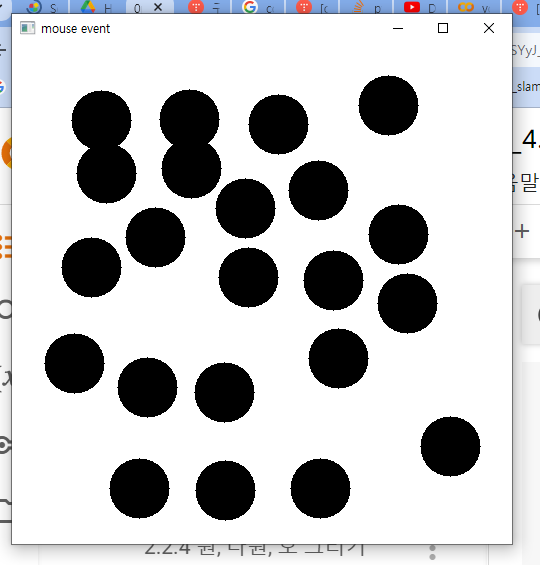

In [ ]:
import cv2

title = 'mouse event'                            # 창 제목
img = cv2.imread('../img/blank_500.jpg')         # 백색 이미지 읽기
#cv2.imshow(title, img)                          # 백색 이미지 표시
cv2_imshow(img)                                  # 백색 이미지 표시

def onMouse(event, x, y, flags, param):          # 아무스 콜백 함수 구현 ---①
    print(event, x, y, )                         # 파라미터 출력
    if event == cv2.EVENT_LBUTTONDOWN:           # 왼쪽 버튼 누름인 경우 ---②
        cv2.circle(img, (x,y), 30, (0,0,0), -1)  # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        #cv2.imshow(title, img)                  # 그려진 이미지를 다시 표시 ---③
        cv2_imshow(img)                          # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(title, onMouse)             # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0) & 0xFF == 27:              # esc로 종료
        break
cv2.destroyAllWindows()

### 2.4.3 트랙바

In [ ]:
!python event_trackbar.py

In [ ]:
import cv2
import numpy as np

win_name = 'Trackbar'                                   # 창 이름

img = cv2.imread('../img/blank_500.jpg')
#cv2.imshow(win_name,img)                                # 초기 이미지를 창에 표시
cv2_imshow(img)                                # 초기 이미지를 창에 표시

# 트랙바 이벤트 처리 함수 선언 ---①
def onChange(x):
    print(x)                                            # 트랙바 새로운 위치 값 --- ②
    # 'R', 'G', 'B' 각 트랙바 위치 값    --- ③
    r = cv2.getTrackbarPos('R',win_name)
    g = cv2.getTrackbarPos('G',win_name)
    b = cv2.getTrackbarPos('B',win_name)
    print(r, g, b)
    img[:] = [b,g,r]                                    # 기존 이미지에 새로운 픽셀 값 적용 --- ④
    cv2.imshow(win_name, img)                           # 새 이미지 창에 표시

# 트랙바 생성    --- ⑤
cv2.createTrackbar('R', win_name, 255, 255, onChange)
cv2.createTrackbar('G', win_name, 255, 255, onChange)
cv2.createTrackbar('B', win_name, 255, 255, onChange)

while True:
    if cv2.waitKey(1) & 0xFF == 27:                     # esc로 종료
        break
cv2.destroyAllWindows()

#참고

## 이미지 연결

<img src="https://github.com/TUIlmenauAMS/Videocoding/blob/main/seminars/images/vc_logo.png?25&raw=1" alt="vc_logo" style="height:300px" >

## 유튜브 연결

In [ ]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZARk4XvJfZw?rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## 코랩에서 동영상 재상하는 방법

- [클릭](https://psygo22.tistory.com/entry/%EA%B5%AC%EA%B8%80-%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%8F%99%EC%98%81%EC%83%81-%EC%9E%AC%EC%83%9D%EC%8B%9C%ED%82%A4%EB%8A%94-%EB%B2%95-mp4)

In [ ]:
!pip install -U kora
from kora.drive import upload_public
#url = upload_public("https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/BigBuckBunny.mp4")
#from IPython.display import HTML
#HTML(f"""<video source src={url} width=500 controls/>""")

## Colab에서 webcam 사용하기
- [클릭](https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw)